**INVERSIÓN SEV**


**Autores:** \
Daniela Quintero. yejoandajudi200305@gmail.com \
Erick Villamizar. erickvillamizar24@gmail.com

**Modificado de** https://www.pygimli.org/_tutorials_auto/3_inversion/plot_4-dc1dsmooth.html

In [ ]:
#Importar pygimli

!pip install pygimli
import pygimli as pg
print(pg.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 743.8/743.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.4 MB/s eta 0:00:00
1.5.1.post1


In [ ]:
#Importar las librerías

import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg

from pygimli.physics.em import HEMmodelling
from pygimli.physics.ves import VESModelling
from pygimli.frameworks import MarquardtInversion
from pygimli.frameworks.lsqrinversion import LSQRInversion
from pygimli.viewer.mpl import drawModel1D

In [ ]:
#Crear modelo sintético

synThk = [10, 15, 25, 120, 150] #espesores de las capas
synRes = [600, 200, 1500,100,500,60] #resistividades de las capas
nlay = len(synRes)  # número de capas
errorEMabs = 3.
errorDCrel = 3.

<ipython-input-4-632f00eef493>:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim((10., -1.))


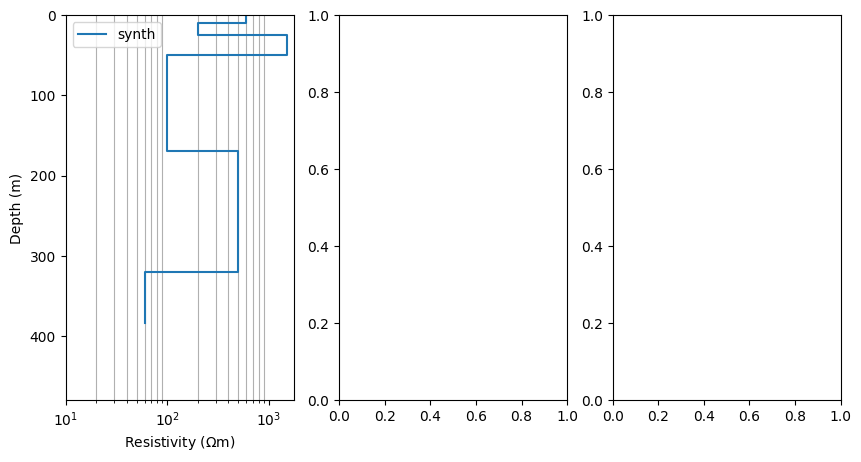

In [ ]:
#Graficar modelo sintético

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 5), ncols=3)
drawModel1D(ax1, synThk, synRes, plot='semilogx', color='C0', label="synth")
ax1.legend()
ax1.set_xlim((10., -1.))
ax1.set_ylim((480., 0.))
ax1.grid(which='both')

[0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.03]


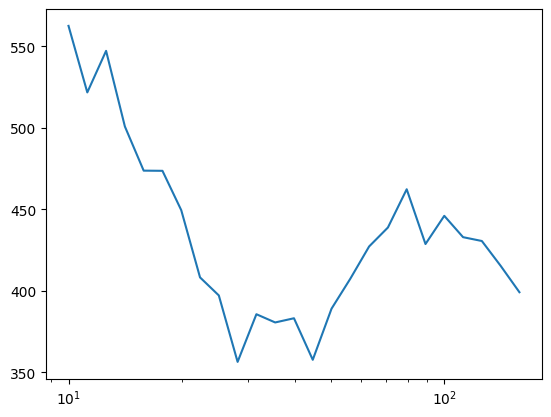

In [ ]:
#Modelado directo del método SEV

ab2 = np.logspace(1,2.2,25)
na =len(ab2)
fDC = VESModelling(ab2=ab2, mn2=np.ones_like(ab2))
dataDC = fDC(synThk + synRes)
errorDC = np.ones_like(dataDC) * errorDCrel / 100.
dataDC *= 1. + pg.randn(len(dataDC), seed=1234) * errorDC
dataDC
plt.semilogx(ab2,dataDC)
print(errorTDEM)

In [ ]:
#Forward modelling de la inversión independiente del método SEDT

fDCinv = VESModelling(ab2=ab2, mn2=np.ones_like(ab2),nLayers=11)

#Aplicar el algoritmo de optimización

invDC = MarquardtInversion(fop=fDCinv, verbose=False, maxIter=50 ,debug = True, stopAtChi= True)

invTDEM.setRegularization(cType=2)

modelDC = invDC.run(dataDC, errorDC, startModel=startModel, lam=100,dPhi=1)

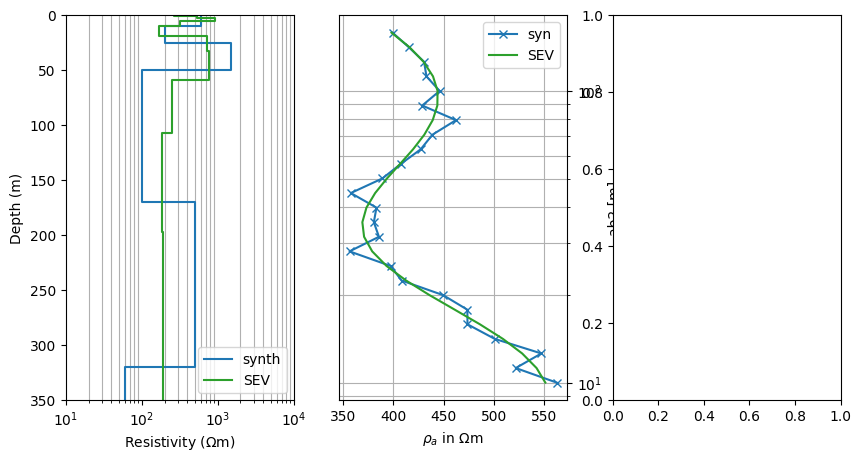

In [ ]:
#Graficar modelo sintético y modelo invertido del método SEV

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 5), ncols=3)
drawModel1D(ax1, synThk, synRes, plot='semilogx', color='C0', label="synth")
drawModel1D(ax1, model=modelDC, color='C2', label="SEV")
ax1.legend()
ax1.set_xlim((10., 10000.))
ax1.set_ylim((350., 0.))
ax1.grid(which='both')


ax2.semilogy(dataDC, ab2, 'x-', label='syn', color="C0")
ax2.semilogy(invDC.response, ab2, '-', label='SEV', color="C2")
ax2.grid(which='both')
ax2.set_xlabel(r"$\rho_a$ in $\Omega$m")
ax2.set_ylabel("ab2 [m]")
ax2.yaxis.set_ticks_position("right")
ax2.yaxis.set_label_position("right")
ax2.legend()